<a href="https://colab.research.google.com/github/pronsSec/IDOR-for-the-casual/blob/main/idor_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

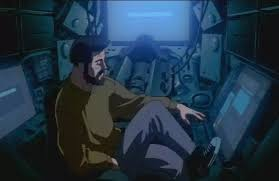

# You ever just wanna idor some stuff ? (Only http responses in csv for now , will be updated when cdata check is added)

In [ ]:
import requests
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


#@title For now there are two fuzzing points and two url insertion points. 
#@markdown Schema: url_1 + fuzz_starting_number + url_2


#@markdown Use the Slider to Choose How Many Iterations and then press the Play button to the left. Press again to stop it..STOP BEFORE CONTINUING. Include all necessary characers in your inputs and the fuzz variables are integer input only. Think of it as putting together blocks.





# a list of discovered subdomains
discovered_subdomains = []
status_codes = []


#form variables
url_1 = '' #@param {type: "string"}
url_2 = '' #@param {type: "string"}
how_many_iterations = 100 #@param {type: "slider", min: 100, max: 1000000}
#@markdown Choose Starting Input
fuzz_starting_number = 1 #@param {type: "integer"}
  #fuzz_location_and_starting_num_2 = #@param {type: "integer"}
counter = 1



while counter <= how_many_iterations:



  #change fuzz_location_and_starting_num_2 to string bc I don't like to do it inline
  #fuzz_location_and_starting_num_2_str = str(fuzz_location_and_starting_num_2)
  fuzz_starting_number_str = str(fuzz_starting_number)

  # construct the url
  url = url_1 + fuzz_starting_number_str + url_2
  
  callin_get = requests.get(url, allow_redirects=True, timeout=10)
  try:
      # if this raises an ERROR, that means the subdomain does not exist
       
    callin_get
    
  
 
      
      # append the discovered subdomain to our list
      #if (callin_get.status_code != 400) and (callin_get.status_code != 404):
    print(url + ' ' + str(callin_get.status_code))
    
    discovered_subdomains.append(url)
    status_codes.append(callin_get.status_code)
    fuzz_starting_number += 1
    counter += 1          
    
  
  except requests.ConnectionError:
      # if the subdomain does not exist, just pass, print nothing        
    pass
  

In [ ]:
#@title Wanna See? { display-mode: "form" }
#@markdown Just Press Play

#loading and showing pandas dataframe

df = pd.DataFrame (list(zip(discovered_subdomains, status_codes)), columns = ['URL', 'Status Code'])
df.head(100)

In [ ]:
#@title Wanna See a Barplot that counts by status code ? { display-mode: "form" }


sns.countplot(data=df, x='Status Code')

In [ ]:
#@title Input the name you would like your downloaded .csv file to have. Press play after. { display-mode: "form" }

name = 'Insert Name Here' #@param {type: "string"}
name2 = name + '.csv'
df.to_csv(name2)
from google.colab import files
files.download(name2)